<img src="./logo_UTN.svg" align="right" width="250" /> 

#### Teoría de Circuitos II - R4001
# Trabajo semanal 11
#### Benjamín Ithurburu

## Introducción
En este notebook se abordarán la resolución de los ejercicios 1) y 2) de la TS11.

Se realizará la síntesis de los cuadripolos, respetando las restricciones pedidas para cada punto. En el primero, se debe cumplir con los parámetros $Y_{11}$ y $Y_{21}$. Mientras que en el segundo punto, el cuadripolo resultante debe cumplir con la función de transferencia $\frac{V_o(s)}{V_i(s)}$ indicada.

Ambos ejercicios fueron llevados a cabo mediante síntesis gráfica y, posteriormente, de forma analítica con la correspondiente verificación.


In [44]:
from IPython.display import IFrame
IFrame("./Trabajo semanal 11.pdf", width=1000, height=1000)

## Simulación Python
A continuación se procede a instanciar funciones y configurar el entorno del notebook para su posterior uso en las simulaciones.

In [40]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
# módulo de análisis simbólico
from sympy import *
init_printing(use_unicode=True)
import sympy as sp
from scipy.signal import TransferFunction
# variable de Laplace
from sympy.abc import s
from IPython.display import display, Math, Markdown

from pytc2.remociones import remover_polo_jw, remover_polo_infinito, remover_polo_dc
from pytc2.dibujar import display, dibujar_foster_derivacion, dibujar_cauer_LC, dibujar_tanque_derivacion, dibujar_puerto_salida, dibujar_puerto_entrada, dibujar_funcion_exc_abajo, dibujar_elemento_serie, dibujar_espacio_derivacion, Resistor, Capacitor, Inductor, dibujar_elemento_derivacion, Drawing
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from pytc2.sintesis_dipolo import foster, cauer_LC
from pytc2.sistemas_lineales import bodePlot

# Configuración de parámetros para fijar estilo de gráficos en notebook. 
# Con el objetivo de que el tamaño de salida, sea adecuado al jubyter notebook.

#%% Inicialización de librerías

# Para eliminar bugs:
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 14
fig_sz_y = 8
fig_dpi = 70
fig_front_size = 15

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_front_size})

#%% Fin - Inicialización de librerías

### Ejercicio 1

#### Síntesis

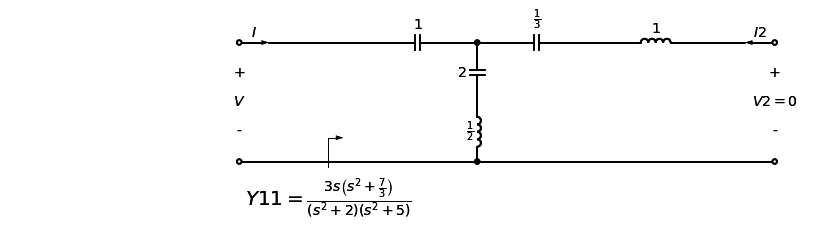

In [41]:
s = sp.symbols('s', complex=True)

YY = (3*s*(s**2 + sp.Rational(7,3)))/((s**2 + 2)*(s**2 + 5))
################################################################################
omega_L2C2 = 1
Z2, Zc1 = remover_polo_dc(1/YY, omega_zero = omega_L2C2)
# Zc1 es la admitancia removida
# extraigo C1
C1 = 1/(s*Zc1)
################################################################################
Y3, Yt2, L2, C2 = remover_polo_jw(1/Z2, isImpedance = False, omega = omega_L2C2)
################################################################################
Z4, Zc3 = remover_polo_dc(1/Y3)
# Zc3 es la admitancia removida
# extraigo C3
C3 = 1/(s*Zc3)
################################################################################
Z5, Zt4 = remover_polo_infinito(1/Y3)
# Zt3 es la admitancia removida
# extraigo L3
L3 = Zt4/s
################################################################################

d = dibujar_puerto_entrada(Drawing(unit=4),
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, yy_lbl = dibujar_funcion_exc_abajo(d, 
                 'Y11',  
                 YY, 
                 hacia_salida = True,
                 k_gap_width = 0.5)

d = dibujar_elemento_serie(d, Capacitor, C1)

d = dibujar_tanque_derivacion(d, L2, C2)

d = dibujar_elemento_serie(d, Capacitor, C3)

d = dibujar_elemento_serie(d, Inductor, L3)

d = dibujar_puerto_salida(d, voltage_lbl = ('+', '$V2 = 0$', '-'), current_lbl = '$I2$')

display(d)

### Ejercicio 2

#### Síntesis

<IPython.core.display.Math object>

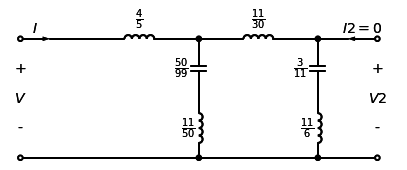

In [42]:
s = sp.symbols('s', complex=True)

ZZ = ((s**2 + 1)*(s**2 + 3))/(s*(s**2 + sp.Rational(7,3)))
display(Math('Z11(s) = ' + sp.latex(ZZ)))
################################################################################
Z2, Z1 = remover_polo_infinito(ZZ, omega_zero=3)
# Z1 es la admitancia removida
# extraigo L1
L1 = Z1/s
################################################################################
omega_L2C2 = 3
Y3, Yt2, L2, C2 = remover_polo_jw(1/Z2, isImpedance = False, omega = omega_L2C2)
################################################################################
Z4, Zt3 = remover_polo_infinito(1/Y3, omega_zero=sp.sqrt(2))
# Zt3 es la admitancia removida
# extraigo L3
L3 = Zt3/s
################################################################################
omega_L4C4 = sp.sqrt(2)
Y5, Yt4, L4, C4 = remover_polo_jw(1/Z4, isImpedance = False, omega = omega_L4C4)
################################################################################

d = dibujar_puerto_entrada(Drawing(unit=4),
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d = dibujar_elemento_serie(d, Inductor, L1)

d = dibujar_tanque_derivacion(d, L2, C2)

d = dibujar_elemento_serie(d, Inductor, L3)

d = dibujar_tanque_derivacion(d, L4, C4)

d = dibujar_puerto_salida(d, voltage_lbl = ('+', '$V2$', '-'), current_lbl = '$I2 = 0$')

display(d)


#### Verificación de función transferencia con valores obtenidos en síntesis:

<IPython.core.display.Math object>

(1,
 array([<Axes: title={'center': 'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <Axes: title={'center': 'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>],
       dtype=object))

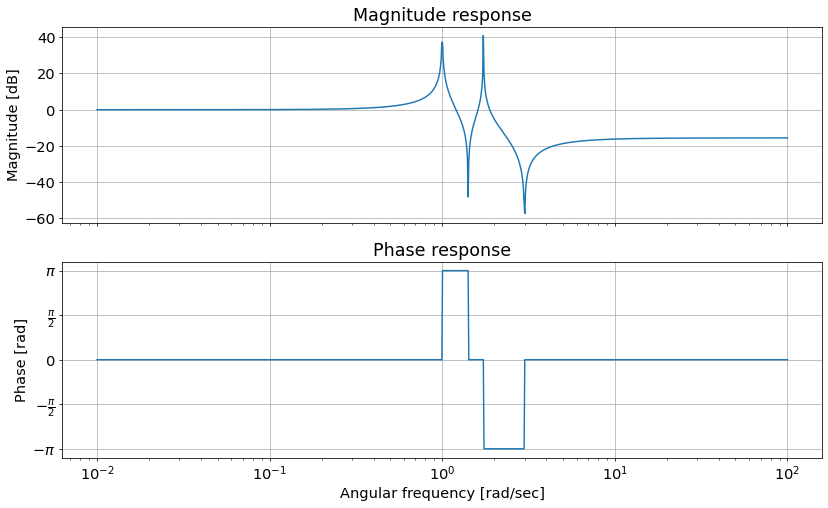

In [43]:
z1 = L1*s
z2 = L3*s
y1 = s*C2/(1+L2*C2*s**2)
y2 = s*C4/(1+L4*C4*s**2)

# Término A de la resultante de multiplicar dos matrices T de cuadripolos L en cascada
A = (1+z1*y1)*(1+z2*y2)+z1*y2

display(Math( r' \frac{V_o}{V_i} = ' + sp.latex(collect(sp.simplify(sp.expand(A**-1)), s))))
num, den = sp.fraction(sp.simplify(sp.expand(sp.Mul(A**-1, evaluate=False))))

num_coeffs = np.float64(sp.Poly(num,s).all_coeffs())
den_coeffs = np.float64(sp.Poly(den,s).all_coeffs())
# Verificación de coeficientes cero
eps = 1e-13  # Pequeño valor para evitar ceros
num_coeffs = np.where(num_coeffs == 0, eps, num_coeffs)
den_coeffs = np.where(den_coeffs == 0, eps, den_coeffs)

# Obtención de función transferencia
my_tf = TransferFunction(num_coeffs,den_coeffs)

# Gráfico Bode
bodePlot(my_tf, fig_id=1)

## Simulación circuital

### Ejercicio #1

##### Ej_1: Esquemático
<center><img src="./circuito_ej1.png" width="1000"/></center>

##### Ej_1: Y11
<center><img src="./simulacion_y11_ej1.png" width="1000"/></center>

\begin{equation}
\omega_{1} = 2\pi \cdot f_{1} = 2\pi \cdot 0.225 \, \text{Hz} \approx \sqrt{2}
\end{equation}

\begin{equation}
\omega_{2} = 2\pi \cdot f_{2} = 2\pi \cdot 0.243 \, \text{Hz} \approx \sqrt{\frac{7}{3}}
\end{equation}

\begin{equation}
\omega_{3} = 2\pi \cdot f_{3} = 2\pi \cdot 0.356 \, \text{Hz} \approx \sqrt{5}
\end{equation}

##### Ej_1: Y21
<center><img src="./simulacion_y21_ej1.png" width="1000"/></center>

\begin{equation}
\omega_{1} = 2\pi \cdot f_{1} = 2\pi \cdot 0.159 \, \text{Hz} \approx 1
\end{equation}

\begin{equation}
\omega_{2} = 2\pi \cdot f_{2} = 2\pi \cdot 0.225 \, \text{Hz} \approx \sqrt{2}
\end{equation}

\begin{equation}
\omega_{3} = 2\pi \cdot f_{3} = 2\pi \cdot 0.356 \, \text{Hz} \approx \sqrt{5}
\end{equation}

### Ejercicio #2

##### Ej_2: Esquemático
<center><img src="./circuito_ej2.png" width="1000"/></center>

##### Ej_2: $\frac{Vo(s)}{Vi(s)}$
<center><img src="./simulacion_ej2.png" width="1000"/></center>

\begin{equation}
\omega_{1} = 2\pi \cdot f_{1} = 2\pi \cdot 0.159 \, \text{Hz} \approx 1
\end{equation}

\begin{equation}
\omega_{2} = 2\pi \cdot f_{2} = 2\pi \cdot 0.225 \, \text{Hz} \approx \sqrt{2}
\end{equation}

\begin{equation}
\omega_{3} = 2\pi \cdot f_{3} = 2\pi \cdot 0.276 \, \text{Hz} \approx \sqrt{3}
\end{equation}

\begin{equation}
\omega_{4} = 2\pi \cdot f_{4} = 2\pi \cdot 0.477 \, \text{Hz} \approx 3
\end{equation}

## Conclusión

Se puede observar en los gráficos de las simulaciones el cumplimiento del diagrama de polos y ceros en ambos ejercicios. En el ejercicio #1, se verificó que los parámetros $Y_{11}$ y $Y_{21}$ se cumplieran adecuadamente, lo que refleja la correcta implementación de la síntesis. 

A su vez, la simulación simbólica realizada para el ejercicio #2 contribuye a la verificación, arrojando un gráfico "exacto" del módulo y la fase a partir de lo sintetizado, que concuerda a la perfección con la simulación en LTspice y lo que se preveía a partir del diagrama de polos y ceros. Esta coincidencia es fundamental, ya que valida la metodología utilizada y su aplicabilidad en el diseño de cuadripolos.

Los resultados obtenidos demuestran no solo la precisión de la síntesis gráfica y analítica, sino también el potencial de esta metodología en conjunto con los métodos vistos previamente sobre cuadripolos.